In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [20]:
data = pd.read_csv('data_for_lr.csv')

In [21]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [23]:
data = data.dropna()
print("Shape of the dataset = {}".format(data.shape))


Shape of the dataset = (699, 2)


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


In [25]:
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output  = np.array(data.y[0:500]).reshape(500,1)

test_input = np.array(data.x[500:700]).reshape(199,1)
test_output  = np.array(data.y[500:700]).reshape(199,1)

print("Train Input Shape = {}".format(train_output.shape))
print("Train Output  Shape = {}".format(train_output.shape))
print("Test Input Shape = {}".format(test_input.shape))
print("Test Output  Shape = {}".format(test_output.shape))

Train Input Shape = (500, 1)
Train Output  Shape = (500, 1)
Test Input Shape = (199, 1)
Test Output  Shape = (199, 1)


In [26]:
def forward_propagation(train_input, parameters):
    m = parameters['m']
    c = parameters['c']
    predictions = np.multiply(m, train_input) + c
    return predictions

In [27]:
def cost_function(predictions, train_output):
    cost = np.mean((train_output - predictions) ** 2) * 0.5
    return cost

In [28]:
def backward_propagation(train_input, train_output, predictions):
    derivatives = dict()
    df = (train_output - predictions) * -1
    dm = np.mean(np.multiply(train_input, df))
    dc = np.mean(df)
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    return derivatives

In [29]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    return parameters


In [30]:
def train(train_input, train_output, learning_rate, iters):
    
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1) * -1
    parameters["c"] = np.random.uniform(0,1) * -1
    
    plt.figure()
    
    loss = list()
    
    for i in range(iters):
        
        predictions = forward_propagation(train_input, parameters)
        
        cost = cost_function(predictions, train_output)
        
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))
        
        fig, ax = plt.subplots()
        
        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')

        legend = ax.legend()
        
        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')        
        
        plt.show()
        
        derivatives = backward_propagation(train_input, train_output, predictions)
        
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters, loss

Iteration = 1, Loss = 2126.1262617367597


<Figure size 640x480 with 0 Axes>

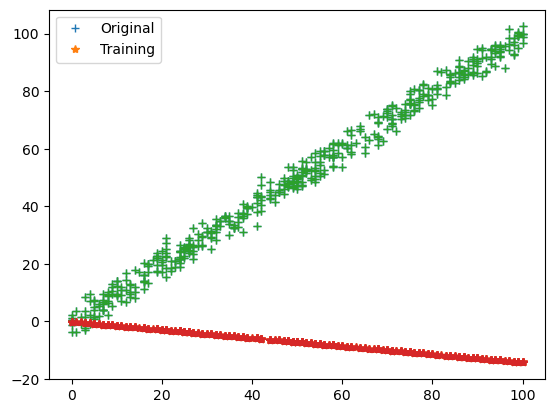

Iteration = 2, Loss = 966.7641871823326


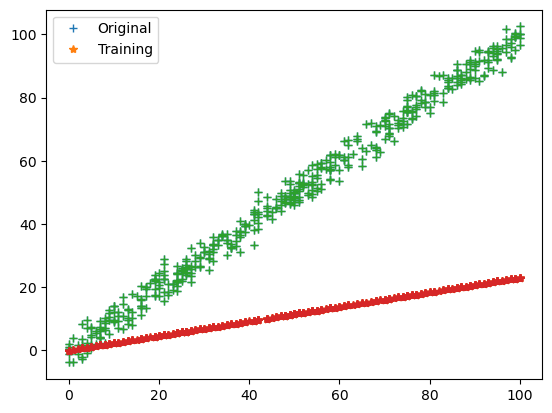

Iteration = 3, Loss = 440.7603296928938


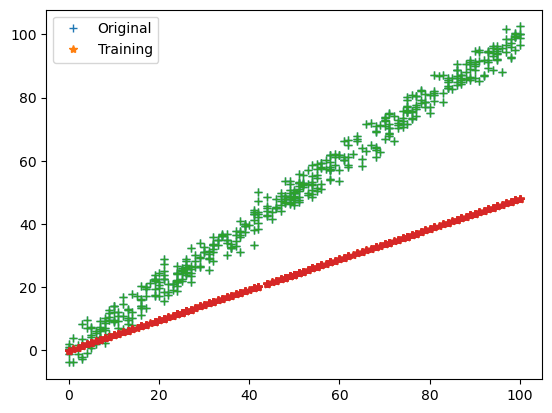

Iteration = 4, Loss = 202.11179681951023


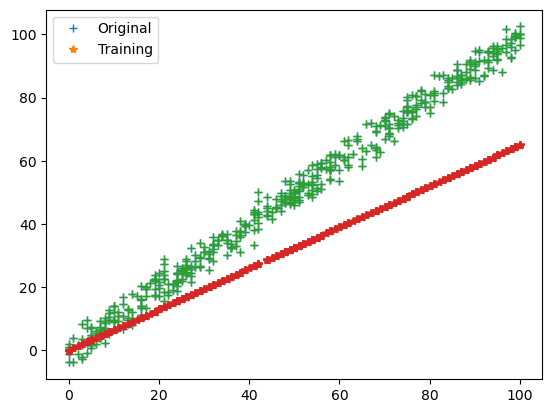

Iteration = 5, Loss = 93.83669301103689


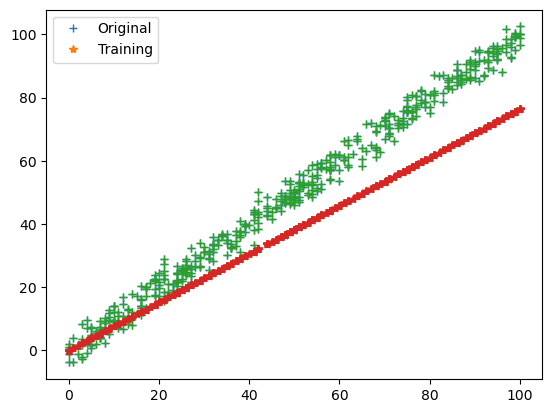

Iteration = 6, Loss = 44.71215837630196


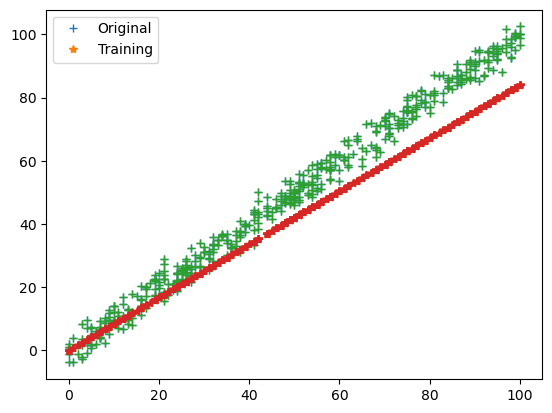

Iteration = 7, Loss = 22.424302493305866


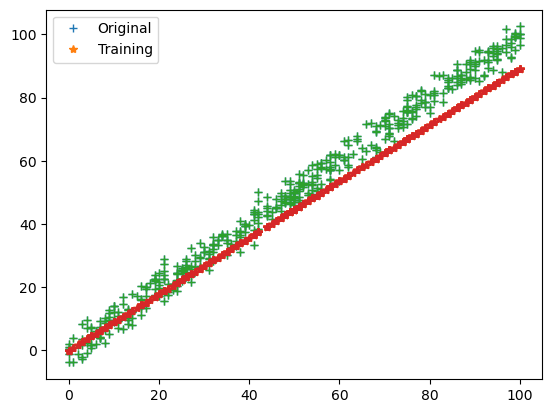

Iteration = 8, Loss = 12.31227748539047


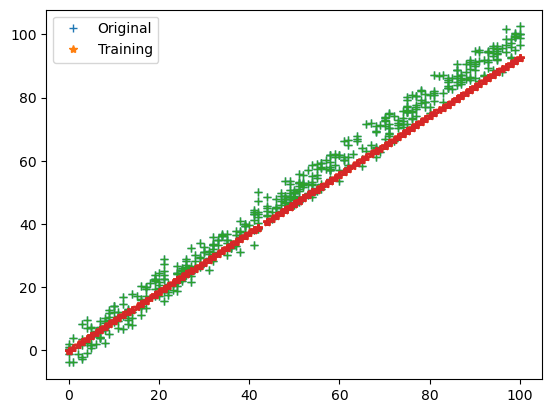

Iteration = 9, Loss = 7.724440431956615


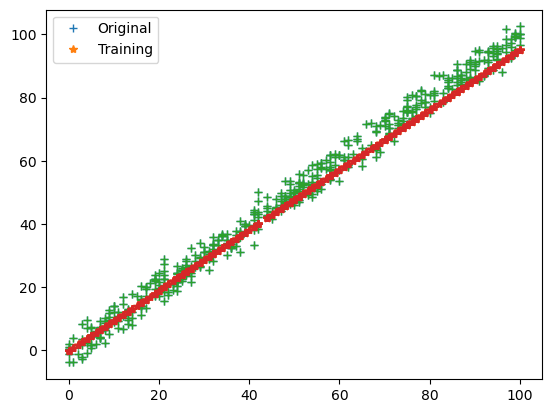

Iteration = 10, Loss = 5.6429335722947


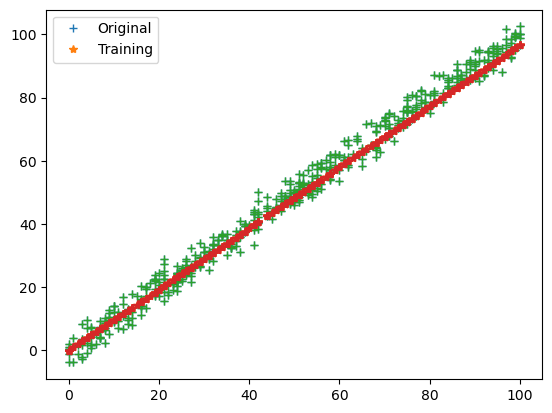

Iteration = 11, Loss = 4.698551497667117


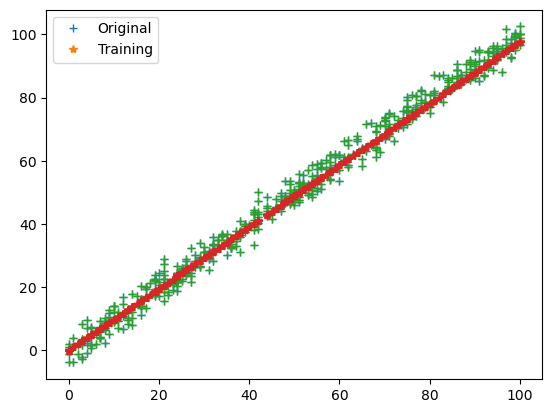

Iteration = 12, Loss = 4.270084197541272


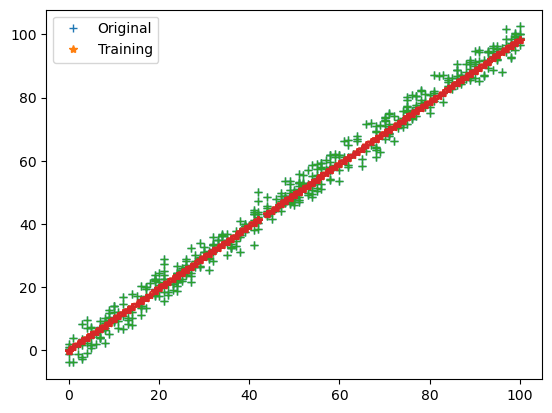

Iteration = 13, Loss = 4.075688002060704


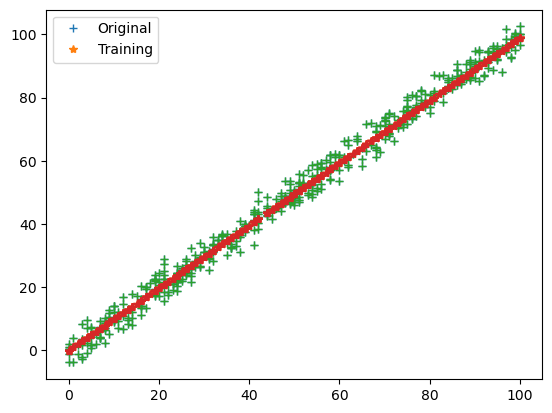

Iteration = 14, Loss = 3.9874901260298903


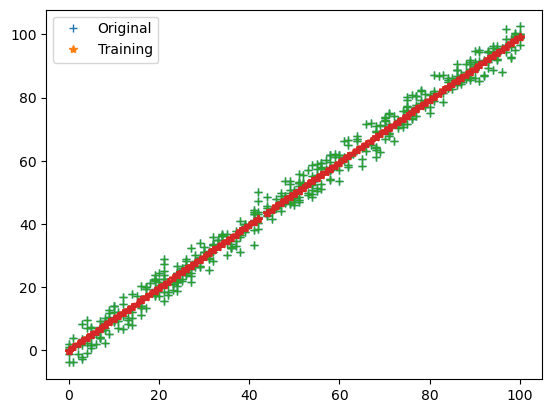

Iteration = 15, Loss = 3.947474545168444


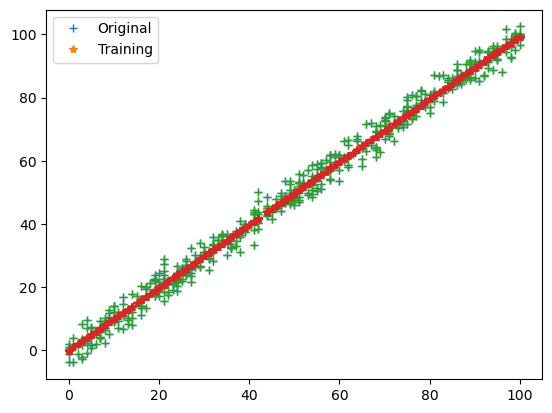

Iteration = 16, Loss = 3.9293193249994163


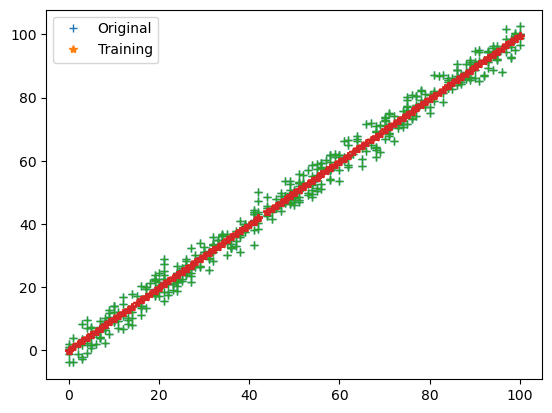

Iteration = 17, Loss = 3.9210821746953544


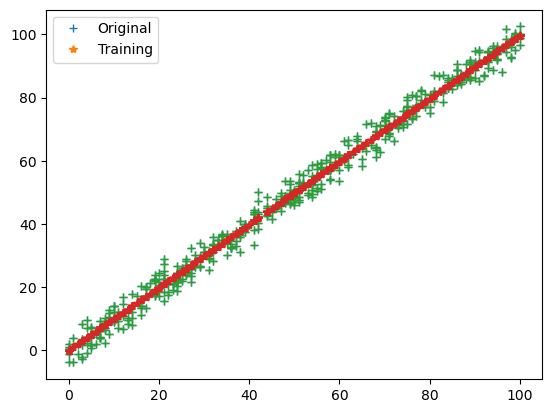

Iteration = 18, Loss = 3.917344863680073


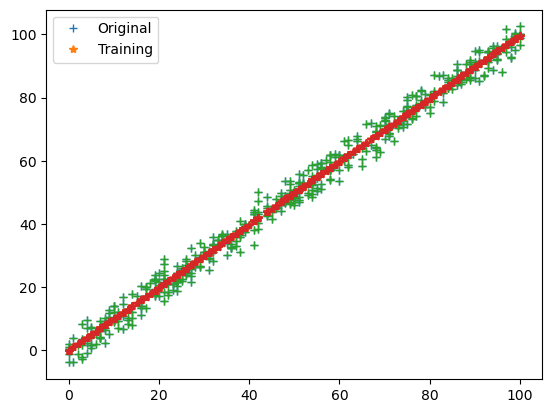

Iteration = 19, Loss = 3.915649134739696


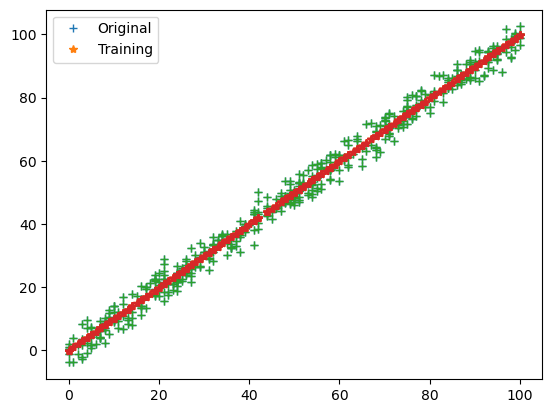

Iteration = 20, Loss = 3.914879673853426


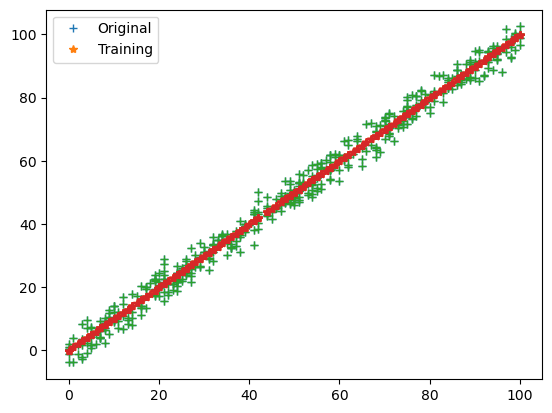

Iteration = 21, Loss = 3.914530461814654


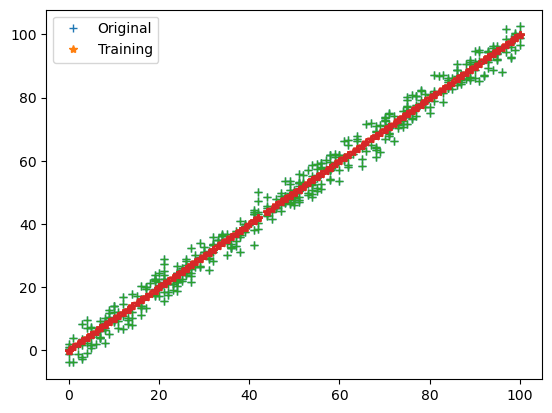

Iteration = 22, Loss = 3.9143719171488565


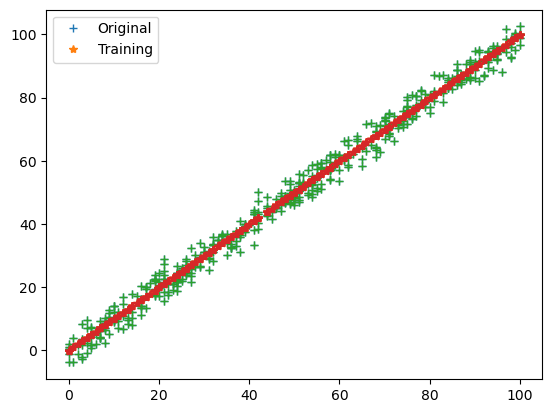

Iteration = 23, Loss = 3.9142998784867475


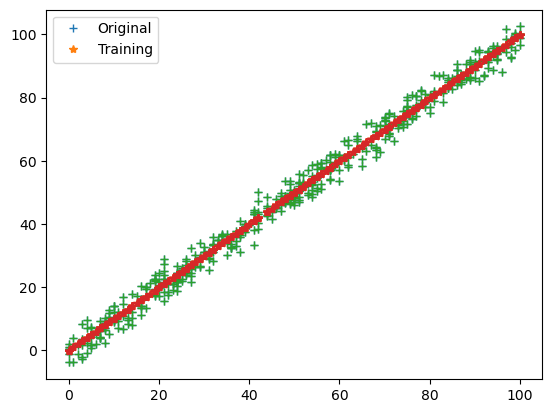

Iteration = 24, Loss = 3.914267087699708


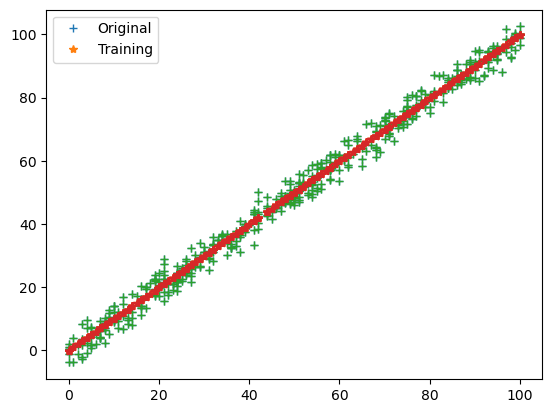

Iteration = 25, Loss = 3.9142521037224367


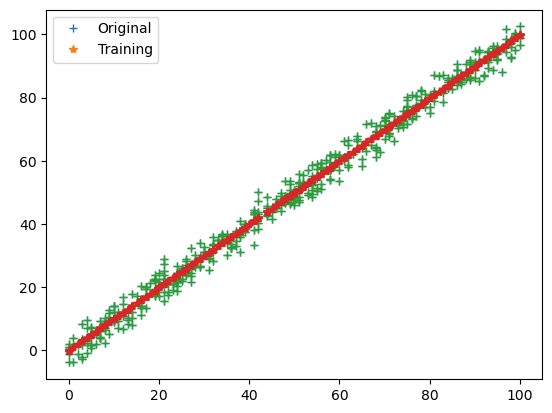

Iteration = 26, Loss = 3.914245198719861


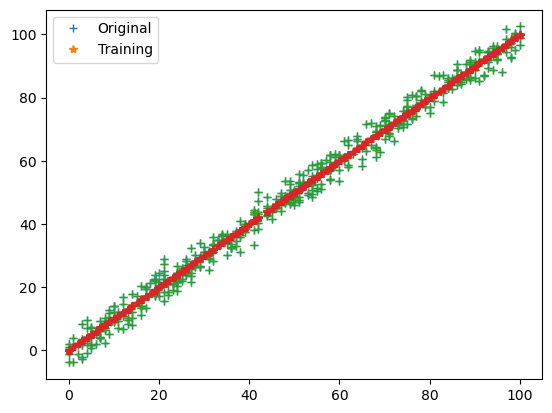

Iteration = 27, Loss = 3.9142419591624305


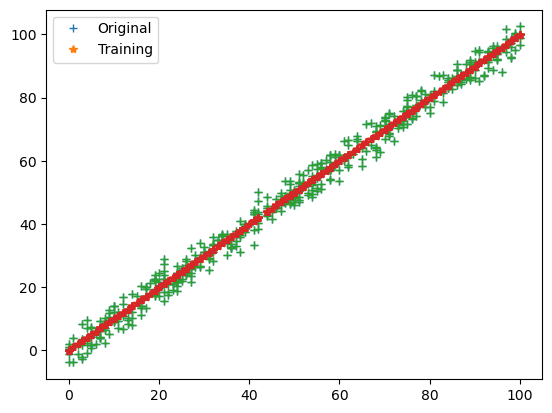

Iteration = 28, Loss = 3.9142403826268986


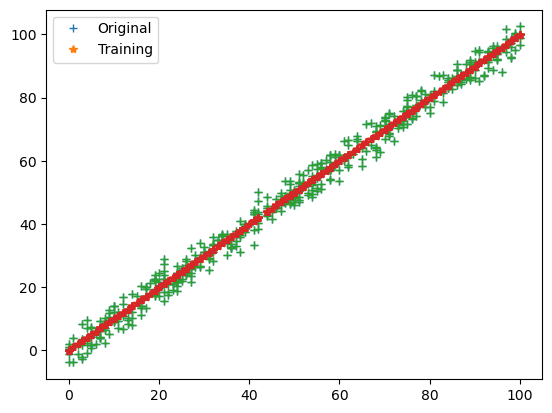

Iteration = 29, Loss = 3.914239560611621


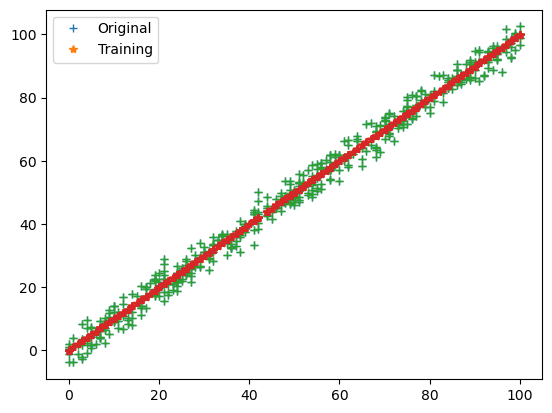

Iteration = 30, Loss = 3.9142390809283967


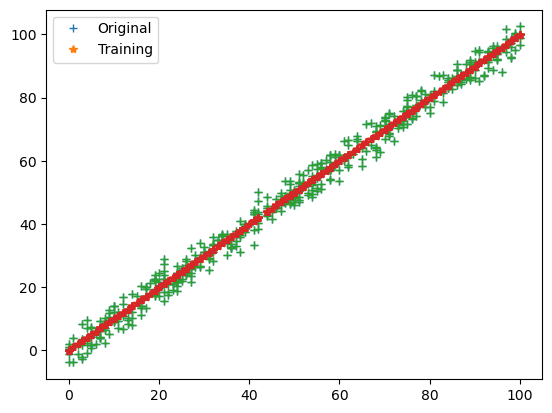

In [31]:
parameters, loss = train(train_input, train_output, 0.0001, 30)

In [18]:
print(parameters)

{'m': 1.0080146939079897, 'c': -0.6998606651352013}


In [32]:
loss

[2126.1262617367597,
 966.7641871823326,
 440.7603296928938,
 202.11179681951023,
 93.83669301103689,
 44.71215837630196,
 22.424302493305866,
 12.31227748539047,
 7.724440431956615,
 5.6429335722947,
 4.698551497667117,
 4.270084197541272,
 4.075688002060704,
 3.9874901260298903,
 3.947474545168444,
 3.9293193249994163,
 3.9210821746953544,
 3.917344863680073,
 3.915649134739696,
 3.914879673853426,
 3.914530461814654,
 3.9143719171488565,
 3.9142998784867475,
 3.914267087699708,
 3.9142521037224367,
 3.914245198719861,
 3.9142419591624305,
 3.9142403826268986,
 3.914239560611621,
 3.9142390809283967]

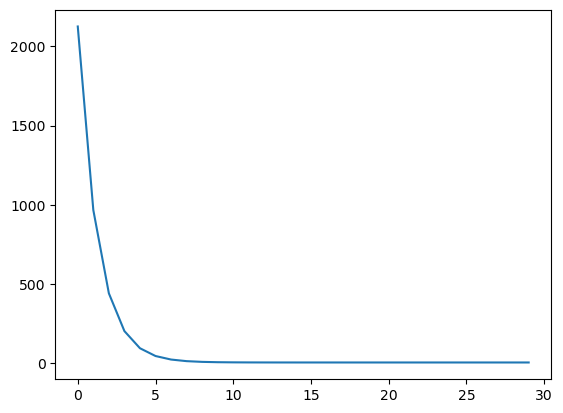

In [33]:
plt.plot(loss)

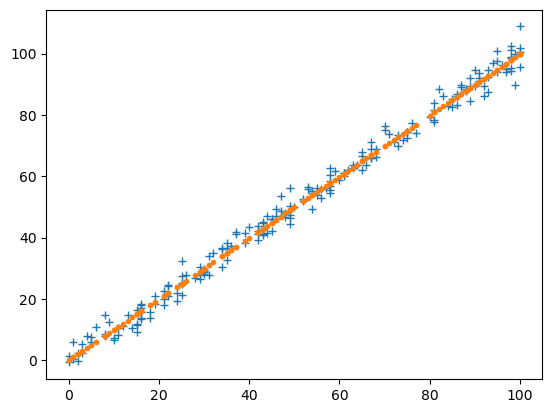

In [34]:
test_predictions = test_input * parameters["m"] + parameters["c"]
plt.figure()
plt.plot(test_input, test_output, '+')
plt.plot(test_input, test_predictions, '.')
plt.show()

In [35]:
cost_function(test_predictions, test_output)

3.9996117154808783

In [ ]:
#pred +- 3.9996117154808783 error range